# Trabalho Prático - Análise de Dados de Manchas Solares ao Longo dos Anos

### 1. Algoritmo

O objetivo principal deste trabalho é identificar padrões relacionados aos ciclos solares utilizando dados históricos sobre manchas solares. O algoritmo foi desenvolvido para tratar diferentes tipos de análise sobre esses dados, com foco especial na identificação do início e fim de ciclos solares.

A estratégia geral adotada pode ser descrita da seguinte forma:

1. O programa inicia com a leitura e estruturação dos dados fornecidos em arquivos `.txt`, organizando-os em dicionários hierárquicos (ano → mês → dia) para dados diários e (ano → mês) para dados mensais, que armazenam as manchas solares, o desvio padrão e o número de observações realizadas por dia.

2. Com os dados carregados, são realizadas análises diversas, como:
   - A identificação dos dias sem dados disponíveis.
   - A contagem de dias sem manchas solares por mês e por ano.
   - A busca pelo mês com maior número de manchas solares, considerando a média mensal ajustada pelo número de dias válidos.

3. Para análise da variabilidade mensal, são calculadas médias mensais e médias suavizadas com base na fórmula oficial fornecida pelas instituições responsáveis pelos dados (SIDC/SILSO). As médias suavizadas são utilizadas para facilitar a visualização de ciclos solares e a detecção dos pontos de máximo e mínimo.

4. Com o auxílio dessas médias suavizadas, o programa identifica os ciclos solares automaticamente, detectando pontos mínimos e máximos no número de manchas solares ao longo do tempo. Esses pontos permitem definir os limites temporais de cada ciclo solar.

5. Por fim, os dados são visualizados por meio de gráficos que exibem os valores observados, as médias mensais e as médias suavizadas em relação ao tempo, com o eixo x representando os anos desde um ano inicial inserido mantendo uma escala temporal uniforme. Isso permite avaliar o comportamento cíclico das manchas solares e investigar a duração de cada ciclo.

Essa abordagem modular permite que o usuário selecione diferentes tipos de análise de forma independente, mantendo uma lógica unificada baseada na leitura dos dados e na extração de padrões estatísticos e visuais.

### 2 - Organização do Programa

Para a resolução deste trabalho, escolhi seguir a elobaração das funções de análise e leitura de dados recomendadas no enunciado. Abaixo estão as lógicas de implementação das funções elaboradas.

(a ordem das opções de análise do programa não condizem com a descrição das funções abaixo)


**1a. Função:**
Para a leitura de dados e criação de dicionários, decidi criar a função `criar_dicionario` que tem como variáveis de entrada: o path do arquivo . TXT e duas variáveis booleanas que informam qual o objeto da leitura de dados - leitura dos desvios padrões diários ou número de observações diárias feitas.

Esta função abre e lê o arquivo. Para o arquivo mensal, é criado um dicionário onde as chaves são os anos e os valores são "sub dicionários", esses têm os meses como chaves e os valores são as manchas solares mensais observadas. Para o arquivo diário, as chaves são os anos e os valores são os meses e estes armazenam mais um dicionário, contendo os dias como chaves e as manchas solares diárias observadas como valores (caso ambas as variáveis booleanas sejam falsas, indicando que deseja-se ler as manchas solares). Ou seja,

Arquivo mensal : {ano : {mês : manchas_solares_mensais}}

Arquivo diário : {ano : {mês : {dia : manchas_solares_diárias}}}

Caso tenhamos dias onde não há informações disponíveis sobre a quantidade de manchas solares, tal valor é salvo no dicionário como "Não há dados disponíveis". Analogamente, será necesssário, para objetivos posteriores, a leitura do desvio padrão diário e o número de observações feitas. Informações contidas em diferentes colunas das linhas.: {ano : {mês : {dia : manchas_solares_diárias}}} Sendo,

bool_dp = True : {ano : {mês : {dia : desvio_padrão_diário}}}

bool_obs = True : {ano : {mês : {dia : observações_diárias}}}

Desse modo, é possível acessar os dados de forma hierárquica e organizada. De modo que cada linha do arquivo .txt é lida e cada item das colunas são catalogados e armazenados no dicionário, de acordo com as informações fornecidas pelos sites http://www.sidc.be/silso/infosndtot e http://www.sidc.be/silso/infosnmtot.

**2a. Função:**
Em seguida, criei uma função que faça a ano_com_mais_dias_sem_manchas e quantificação de quantos dias não há dados disponíveis. A função `ler_dados_indiponiveis` recebe um ano específico com variável, lendo o dicionário diário criado pela função anterior, contando quantos dias as manchas solares/sunspots foram determinados como "Não há dados disponíveis." e retornando um dicionário com a quantidade de dias sem dados para cada mesmo, para o ano fornecido. A lógica é percorrer o dicionário, verificar se há meses ou dias sem dados e contar esses casos.

**3a. Função:**
A função `ano_com_mais_dias_sem_manchas` fará a leitura do dicionário diário criado pela função 01, contabilizando quantos dias em determinado mês o número de manchas solares é igual a zero. Designando inicialmente ano e mês qualquer como ano e mês máximo, assim como o valor máximo de dias sem manchas solares lido.

A função percorre o dicionário, verificando se o valor é igual a zero e, caso seja, incrementa o contador de dias sem manchas solares. Se o contador for maior que o máximo, atualiza o ano, mês e valor máximo de dias sem manchas solares.

**4a. Função:**
A função `periodo_com_mais_manchas_solares` percorre os dicionários mensais e diários criados pela função 01, contabilizando um mês que apresente maior número de manchas solares apresentando metodologias diferentes para cada leitura.

Para o dicionário mensal, a função percorre os anos e meses, identificando e alterando o ano máximo e mês máximo caso o ano e o mês lidos, apresentem um maior número de manchas, como na função anterior.

Para o dicionário diário, a função percorre os anos, meses e dias, somando as manchas solares diárias (caso sejam dados disponíveis) e os dias válidos em um mês (são aqueles com dados disponíveis), isto para o cálculo da média de manchas solares observadas em um determinado mês. Nesse caso, a opção de analisarmos as médias mensais para o dicionário diário contabilizando os dias válidos é interessante, pois nos permite balancear a análise uma vez que para meses com mais dias, o seu número de manchas solares é maior. Assim, para balancear isso, decidi calcular e determinar o período com mais manchas solares aquele de maior média, desprezando para cálculos, meses que apresentassem muitos dias inválidos (com menos de 18 dias válidos, por exemplo).

Essa contabilização de dias válidos e da determinação de média apenas para meses com mais de 18 dias válidos é importante para evitar distorções na análise, uma vez que meses com poucos dados podem apresentar médias muito altas ou muito baixas, dependendo da quantidade de manchas observadas.

**5a. Função:**
Essa função recebe como variáveis de entrada dois meses e dois anos (um ano e um mês inicial e um ano e um mês final) e retorna os períodos com mais e menos manchas solares observadas nesse intervalo. A função percorre os dicionários mensais, utilizando a mesma lógica das funções anteriores, definindo o ano e mês máximo e mínimo, assim como o número máximo e mínimo de manchas solares observadas. Assim que um valor de manchas é superior ou inferior ao máximo ou mínimo, respectivamente, o ano e mês são atualizados, assim como os novos máximos e mínimos.

**6a. Função:**
`printando_info_max_e_min` busca fazer uma análise dos resultados obtidos da função anterior, imprimindo as informações de forma organizada e clara. A função recebe os anos e meses máximos e mínimos, assim como o número máximo e mínimo de manchas solares observadas, e imprime essas informações de forma legível, levando em consideração se houveram mais de uma data como máximo ou mínimo.

**7a. Função:**
A função `media_mensal` é análoga à função 04, sendo a única diferença que ela analisa o resultado para um ano específico - que esteja entre 1818 e 2025 - recebendo tal ano específico como variável de entrada. A função percorre o dicionário diário, verificando dias válidos sem realizar a filtragem de meses com poucos dias válidos, uma vez que agora a análise é individual (para cada ano por vez), contabilizando as manchas diárias e calculando a média aritmética mensal.

**8a. Função:**
`desvio_padrao_mensal` realiza uma leitura dos dicionários desvio padrão e número de observações - obtidas da função 01 -, calculando o desvio padrão mensal para um ano específico. A função percorre o dicionário diário, verificando os dias válidos e calculando o desvio padrão mensal para cada mês do ano especificado, utilizando a fórmula disponível no site de dados: sigma(m)=sqrt(SUM(N(d)*sigma(d)^2)/SUM(N(d))). Retornando cada mês nesse ano com seu desvio padrão mensal calculado.

**9a. Função:**
A função `media_suavizada_mes` foi a mais difícil de ser implementada e de pensar em uma lógica para seu cálculo. Inicialmente, a função recebe dois anos como variáveis de entrada, um ano inicial e um ano final.

Uma vez que seria utilizada, criou-se uma lista contendo inteiros que representam os pesos usados no cálculo da média suavizada, de acordo com a fórmula disponível no site de dados. Assim, definiu-se uma lista de pesos com 13 elementos, sendo 0.5 nas extremidades e 1.0 nos elementos centrais. Além disso, criou-se uma lista contendo os meses do ano, a fim de facilitar a identificação dos meses durante o cálculo da média suavizada para uma lógica futura.

Primeiro, a função verifica se o ano analisado é o ano inicial do dicionário mensal (1749) e, caso seja, ignora-se os 6 primeiros meses do ano, onde a média suavizada não pode ser calculada, definindo-os como zero. Verificando se o ano analisado é o ano final do dicionário mensal (2025) e, caso seja, simplesmente defini-se a média suavizada dos meses como zero diretamente - como temos dados até o mês de abril. Verificando se o ano é o ano de 2024, verifica-se se o mês é posterior a outubro, fazendo o mesmo para o caso de 1749 aos meses posteriores.

Para anos intermediários, a função percorre os meses do ano de modo a encontrar o escopo da variação - seis meses antes e seis meses depois - trabalhando com o número do mês analisado, subtraindo e somando 6. Caso o valor seja positivo, significa que dados de meses do próximo ano precisam ser lidos. Caso seja negativo, significa que dados de meses do ano anterior precisam ser lidos. Assim, apenas precisa-se verificar o quanto será analisado para frente e para trás acessando os meses corretos e percorrendo os meses do ano correto, seguindo a fórmula fornecida.

Por fim, a função retorna um dicionário onde os anos são as chaves e os valores são sub dicionários contendo os meses e suas respectivas médias suavizadas calculadas.

**10a. Função:**
A função `calcular_dias_desde_1749` recebe um ano, mês e dia como variáveis de entrada e calcula o número de dias desde 1/1/1749 até a data especificada. A função percorre os anos completos, meses e dias, utilizando a lógica de anos bissextos para calcular o total de dias corretamente. Retorna o total de dias calculado.

Sua utilização é importante para que todos os gráficos gerados na próxima função apresentem uma escala de tempo coerente e igual, evitando que a vizualização dos dados seja distorcida por diferenças de dias entre os meses e anos.

**11a. Função:**
Agora, `gerando_graficos_sunspot` recebe como variáveis de entrada os anos mínimo e máximo, o dicionário a ser trabalhado para a geração do gráfico, a cor do gráfico e booleanas que indicam se o gráfico a ser gerado é diário, mensal ou das médias suavizadas.

Como os dados diários só estão disponíveis a partir de 1818, caso o ano mínimo seja menor que 1818, o gráfico gerado não terá os dados diários, pois encontrei grande dificuldade em gerar gráficos que apresentassem os dados diários para anos anteriores fazendo com que os dados aparecessema apenas após 1818. Assim, para a determinação dos valores de x e y, a função verifica se o gráfico é diário, mensal ou de médias suavizadas, e define os valores de x e y de acordo com o dicionário fornecido.

Para cada tipo de gráfico, a função cria listas vazias para armazenas os valores de x e y, fazendo uma verificação dos dias com manchas indisponíveis. Designando para x os dias calculados usando a função anterior `calcular_dias_desde_1749`, e para y as manchas solares observadas, médias suavizadas ou médias mensais, dependendo do tipo de gráfico.

**12a. Função:**
Por fim, foi analisado pelo gráfico anterior que os dados de médias suavizadas apresentavam todos os picos acima de 50 e todos os mínimos abaixo desse valor.

Inicialmente, define-se o dicionário de dados sendo o dicionário de média suavizadas a função 09 aplicada de 1749 a 2025. Assim, a função `identificando_ciclos_solares` busca identificar as datas (ano e mês) em que o gráfico atinge esses pontos intermediários para que fosse possível saber quando um valor será mínimo ou será máximo, usando uma lógica de intervalo, uma vez que os valores de médias suavizadas podem não ser exatamente iguais a 50, mas sim próximos a esse valor.

Encontrou-se uma dificuldade em poder determinar exatamente qual o intervalo para comparar os valores, sendo que muitas vezes incluía valores que não eram intermediários ou incluía oscilações (onde o gráfico subia e descia rapidamente). Assim, definiu-se um intervalo de 5 unidades para cima e 3 para baixo (tentativa e erro). A partir disso, a função percorre o dicionário de médias suavizadas de modo que identifica o valor máximo, ano e mês onde tal valor máximo é atingido, e o valor mínimo, ano e mês onde tal valor mínimo é atingido, adicionando-os em uma lista de tuplas. Para que a função saiba quando deve-se para de procurar um valor máximo é quando a função atinge o valor intermediário, indicando que agora deverá procurar um valor mínimo.

A função retorna uma análise da diferença de tempo entre os ciclos solares, calculando a diferença de meses e anos entre os mínimos solares identificados, tratando a melhor maneira de apresentar os resultados.

**13a. Função:**
Para finalizar, a função `identificando_ciclos` recebe como variável o número de um ciclo a ser analisado. Esse número de ciclo é um inteiro que representa o ciclo solar que o usuário deseja analisar. A função percorre a lista de tuplas retornada pela função anterior, identificando o ciclo solar correspondente ao número fornecido, resultando nas datas precisas de início e fim desse dado ciclo.


#### Correlação entre as funções

A função inicial `criar_dicionario` é fundamental para o funcionamento do programa, pois ela estrutura os dados de forma que as demais funções possam acessá-los facilmente. As funções de análise, como `ler_dados_indiponiveis`, `ano_com_mais_dias_sem_manchas`, `periodo_com_mais_manchas_solares`, entre outras, dependem dessa estrutura para realizar suas operações.

Além disso, as funções que retornam dicionários de dados específicos, como `media_mensal`, `desvio_padrao_mensal` e `media_suavizada_mes`, são utilizadas para alimentar as análises mais complexas, como a identificação de ciclos solares na função `identificando_ciclos_solares` e na geração gráfica da função `gerando_graficos_sunspot`.

#### Formato de Saída

A saída do programa é organizada de forma a apresentar os resultados das análises de maneira clara e compreensível. As funções que geram gráficos, como `gerando_graficos_sunspot`, produzem visualizações que mostram as manchas solares observadas, médias mensais e médias suavizadas ao longo do tempo. Já aquelas que representam dados numéricos para cada mês ou ano, buscam evidenciar qual o tempo exato de análise - o mês ou o ano - utilizando para cada mês um dicionário de correlação entre o número de meses e o nome do mês, facilitando a leitura dos resultados.

### 3 - Código

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Determinando funções e variáveis intermediárias para o funcionamento do programa:

In [ ]:
# Criando dicionário de correspondência entre o número do mês e seu nome:
meses_nomes = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril',
    5 : 'Maio',
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}

def verificando_anos_bissextos(ano):
    if ano % 4 == 0 and (ano % 100 != 0 or ano % 400 == 0):
        bissexto = True
    else:
        bissexto = False

    return bissexto


# Criando dicionário contendo as análises oferecidas pelo programa
analises_oferecidas = {
    1: "Gerar gráfico com as médias mensais, médias suavizadas e/ou número de manchas solares diárias em um determinado período",
    2: "Informar a duração precisa de cada ciclo solar",
    3: "Informar qual o início e o fim de determinado ciclo solar",
    4: "Informar o ano e mês com mais manchas solares",
    5: "Informar o ano e o mês com mais dias sem manchas solares",
    6: "Contar quantos dias para cada mês não foram observadas manchas solares, para um dado ano",
    7: "Contar quantos dias para cada mês em um certo ano, não houveram dados disponíveis sobre as manchas solares",
    8: "Calcular a média mensal de cada mês, para um dado ano",
    9: "Calcular o desvio padrão mensal de cada mês para um dado ano",
    10: "Determinar o máximo e o mínimo de manchas solares para um dado período",
    11: "Calcular a média suavizada mensal para um período de anos",
    12: "Sair"
}

Funções principais de análise:

In [ ]:
arquivo_diario = "C:/Users/Guiga/programming/Trabalho_Pratico/SN_d_tot_V2.0.txt"

# Arquivo de teste diário utilizado para testes de funções
"""arquivo_teste_diario = "teste_d.txt"""

# Determinando a função para leitura de dados
def criar_dicionario(arquivo_path, bool_dp, bool_obs):
    dicionario = {}

    # Abrindo o arquivo desejado em cada execução
    with open(arquivo_path, "r") as arquivo:

        # Acessando o contéudo do arquivo.
        for linha in arquivo:
            # limpeza dos dados a serem lidos
            linha = linha.replace('  ',' ')
            linha = linha.replace('  ', ' ').strip()

            # Transformando uma string numa lista, para uma melhor leitura de dados.
            dados = linha.split(" ")

            # Identificando as variáveis.
            ano = int(dados[0])
            mes = int(dados[1])

            # Analisando tipo de arquivo
            if arquivo_path == arquivo_diario:
                dia = int(dados[2])

                # Verificando se o sunspot é válido
                if int(dados[4]) != -1:
                    sunspot = float(dados[4])
                else:
                    sunspot = 'Não há dados disponíveis.'

                # Criando um subdicionário para cada ano.
                subdic = {}

                if ano not in dicionario:
                    dicionario[ano] = subdic
                else:
                    subdic = dicionario[ano]
                    pass

                # Criando (sub)subdicionário para cada mês
                sub_subdic = {}

                if mes not in subdic:
                    subdic[mes] = sub_subdic
                else:
                    sub_subdic = subdic[mes]

                # Implementando uma leitura do número de observações no dia, caso necessário
                if bool_obs:
                    if sunspot != 'Não há dados disponíveis.':
                        num_observacoes = int(dados[6])
                        sub_subdic[dia] = num_observacoes

                # Implementando uma leitura de desvio padrão do arquivo
                elif bool_dp:
                    if sunspot != 'Não há dados disponíveis.':
                        desvio_padrao_diario = float(dados[5])
                        sub_subdic[dia] = desvio_padrao_diario

                # Fazendo leitura das manchas solares observadas
                else:
                    sub_subdic[dia] = sunspot


            else:
                if dados[3] != -1:
                    sunspot = float(dados[3])
                else:
                    sunspot = 'Não há dados disponíveis.'

                subdic = {}

                if ano not in dicionario:
                    dicionario[ano] = subdic
                else:
                    subdic = dicionario[ano]
                    pass

                subdic[mes] = sunspot

    return dicionario


dicio_mensal = criar_dicionario("C:/Users/Guiga/programming/Trabalho_Pratico/SN_m_tot_V2.0.txt", False, False)
dicio_diario = criar_dicionario("C:/Users/Guiga/programming/Trabalho_Pratico/SN_d_tot_V2.0.txt", False, False)
# dicio_diario_teste = criar_dicionario("teste_d.txt", False, False)

"""print(len(dicio_diario))
print(dicio_diario[1819][2])"""


# Definindo uma nova função para contagem de dias sem dados disponíveis
def ler_dados_indiponiveis(ano_especifico):
    # Definindo esse dicionário a ser lido
    dicionario_de_dados = dicio_diario[ano_especifico]

    # Dicionário para armazenar os dias sem dados de cada mês nesse ano
    dicionario_dias_sem_dados = {}

    # Criando loop que verifica cada mês
    for mes, subsubdict in dicionario_de_dados.items():
        # Definindo a variável que conta os dias sem dados
        numero_de_dias_sem_dados = 0

        # Contando os dias sem dados
        for dia, sunspot in dicionario_de_dados[mes].items():
            """print(sunspot)
            print("\n")"""

            if sunspot == 'Não há dados disponíveis.':
                numero_de_dias_sem_dados += 1

            """print(numero_de_dias_sem_dados)"""

        dicionario_dias_sem_dados[mes] = numero_de_dias_sem_dados

    return dicionario_dias_sem_dados



# Definindo uma nova função para contagem de dias sem dados disponíveis
def ler_dias_sem_manchas(ano_especifico):
    # Definindo esse dicionário a ser lido
    dicionario_de_dados = dicio_diario[ano_especifico]

    # Dicionário para armazenar os dias sem manchas de cada mês nesse ano
    dicionario_dias_sem_dados = {}

    # Criando loop que verifica cada mês
    for mes, subsubdict in dicionario_de_dados.items():
        # Definindo a variável que conta os dias
        numero_de_dias_sem_manchas = 0

        # Contando os dias
        for dia, sunspot in dicionario_de_dados[mes].items():
            """print(sunspot)
            print("\n")"""
            if sunspot == 0:
                numero_de_dias_sem_manchas += 1

            """print(numero_de_dias_sem_dados)"""

        dicionario_dias_sem_dados[mes] = numero_de_dias_sem_manchas

    return dicionario_dias_sem_dados

"""print(dicio_diario)
print(dicio_mensal)"""


# Definindo a função para determinar o ano e o mês com menos manchas solares observadas
def ano_com_mais_dias_sem_manchas():
    # Definindo o ano, o mês com maior número de dias sem manchas e esse próprio valor
    max_ano_sem_manchas = 0
    max_mes_sem_manchas = 0
    max_dias_sem_manchas = 0

    # Lendo para cada ano armazenado no dicionário diário
    for ano, subdict in dicio_diario.items():
        """print(f"ANO: {ano}\n")"""
        dicionario_de_dados = dicio_diario[ano]

        # Criando loop que verifica cada mês
        for mes, subsubdict in dicionario_de_dados.items():
            """print(f"MES: {mes}\n")"""
            # Definindo a variável que conta os dias sem manchas
            dias_sem_manchas = 0

            # Contando os dias sem dados
            for dia, sunspot in dicionario_de_dados[mes].items():
                if sunspot == 0:
                    dias_sem_manchas += 1

            if dias_sem_manchas > max_dias_sem_manchas:
                max_dias_sem_manchas = dias_sem_manchas
                max_mes_sem_manchas = mes
                max_ano_sem_manchas = ano


    return f"O ano e o mês com mais dias sem manchas solares registradas foi o mês de {meses_nomes[max_mes_sem_manchas]} do ano de {max_ano_sem_manchas} com {max_dias_sem_manchas} dias sem manchas solares."

# Chamando a função
"""print(ano_com_mais_dias_sem_manchas())"""


# Definindo função para ler o mês e o ano com maior número de manchas solares
def periodo_com_mais_manchas_solares():
    # Definindo o ano, o mês com maior número de manchas e esse próprio valor
    max_ano_manchas = 0
    max_mes_manchas = 0
    max_media_numero_manchas = 0

    # Loop para ler os dados do dicionário diário
    for ano in dicio_diario:
        dicionario_de_dados = dicio_diario[ano]

        # Criando loop que verifica cada mês
        for mes in dicionario_de_dados:
            # Definindo a variável que conta os dias sem manchas e da quantidade de dias válidos em cada mês (com dados disponíveis)
            numero_manchas = 0
            dias_validos = 0

            # Contando os dias sem dados
            for dia, sunspot in dicionario_de_dados[mes].items():
                if sunspot != 'Não há dados disponíveis.':
                    dias_validos += 1
                    numero_manchas += float(sunspot)

            # Determinando a validade do número de dias válidos para tomar a média aritmética
            if dias_validos > 18:
                media_mensal_ = numero_manchas / dias_validos
            else:
                media_mensal_ = 0

            if media_mensal_ > max_media_numero_manchas:
                max_media_numero_manchas = media_mensal_
                max_mes_manchas = mes
                max_ano_manchas = ano

    # Dicionário para ler os dados do dicionário mensal
    for ano, subdict in dicio_mensal.items():
        dicionario_de_dados = dicio_mensal[ano]

        for mes, sunspots in dicionario_de_dados.items():
            if sunspots > max_media_numero_manchas:
                # Atualizando as novas máximas
                max_media_numero_manchas = sunspots
                max_ano_manchas = ano
                max_mes_manchas = mes

    return f"O maior número de manchas solares foi observada no mês {meses_nomes[max_mes_manchas]} do ano de {max_ano_manchas}, com um número de {max_media_numero_manchas:.3f} manchas registradas, em média."


"""print(periodo_com_mais_manchas_solares())"""


"""periodo_especificado = input("Insira um período no seguinte formato: (de __ (mês 1) de __(ano 1) a __ (mês 2) de __(ano 2): ")

# Identificando input do usuário
input_periodo = periodo_especificado.split(' ')

# Definindo variáveis de mês e ano colocado
mes1 = input_periodo[1].lower()
ano1 = int(input_periodo[3])
mes2 = input_periodo[5].lower()
ano2 = int(input_periodo[7])

# Criando função para associar o nome de um mês com o seu número
def identificando_mes(mes_especificado):
    for numero, nome in meses_nomes.items():
        if nome.lower() == mes_especificado:
            return numero

# Associando os meses inseridos com os seus números
numero_mes1 = identificando_mes(mes1)
numero_mes2 = identificando_mes(mes2)"""

"""print(f'{ano1},  {mes1},   {ano2},   {mes2}')
print(f'{numero_mes1},  {numero_mes2}')"""

# Criando função para determinar máximos e mínimos de manchas solares no período fornecido
def max_e_min_manchas(mes_1, mes_2, ano_1, ano_2):
    # Criando uma variável que representa o número de manchas solares registradas em média
    numero_max_sunspot = 0
    numero_min_sunspot = 1000
    ano_de_maximo = []
    ano_de_minimo = []
    mes_de_maximo = []
    mes_de_minimo = []

    for ano in range(ano_1, ano_2 + 1):
        # Definindo dicionário de um ano específico
        dicionario_de_dados = dicio_mensal[ano]

        """print(f'ANO: {ano}')"""
        for mes, sunspot in dicionario_de_dados.items():
            # Determinando em qual mes começar e parar a análise.
            if ano == ano_1:
                """print(f'MES ano 1: {mes}')"""
                if mes < mes_1:
                    """print('A')"""
                    continue
            elif ano == ano_2:
                if mes > mes_2:
                    break

            # Comparação de max e min de cada mes dentro do período
            if sunspot > numero_max_sunspot:
                numero_max_sunspot = sunspot
                # Limpando as listas antes de adicionar os novos dados
                ano_de_maximo.clear()
                mes_de_maximo.clear()
                # Adiciona o ano e o mes do maximo correspondente
                ano_de_maximo.append(ano)
                mes_de_maximo.append(mes)
            elif sunspot < numero_min_sunspot:
                numero_min_sunspot = sunspot
                ano_de_minimo.clear()
                mes_de_minimo.clear()
                ano_de_minimo.append(ano)
                mes_de_minimo.append(mes)
            # Se o sunspot for igual ao número de max/min adicionamos outra data
            elif sunspot == numero_max_sunspot:
                ano_de_maximo.append(ano)
                mes_de_maximo.append(mes)
            elif sunspot == numero_min_sunspot:
                ano_de_minimo.append(ano)
                mes_de_minimo.append(mes)

    return ano_de_maximo, mes_de_maximo, ano_de_minimo, mes_de_minimo, numero_max_sunspot, numero_min_sunspot

"""print(ano_max)
print(mes_max)
print(ano_min)
print(mes_min)
print(num_max)
print(num_min)"""

# Printando as informações recebidas da função max_e_min_manchas
def printando_info_max_e_min(ano_max, mes_max, num_max, ano_min, mes_min, num_min):
    if len(ano_max) > 1:
        print(f"Houve mais de uma data com um máximo de manchas solares no período informado.\nAs seguintes datas apresentaram um número de {num_max} de manchas solares observadas em média:\n")
        for indice_ano in range(len(ano_max)):
            print(f"mês de {meses_nomes[mes_max[indice_ano]]} de {ano_max[indice_ano]}")
    else:
        print(f"\nO máximo de manchas solares foi observado no mês de {meses_nomes[mes_max[0]]} de {ano_max[0]} com {num_max} manchas em média.\n")

    if len(ano_min) > 1:
        # Abordando o caso de nenhuma mancha solar observada para mais clareza e naturalidade de resposta
        if num_min == 0:
            print(f"Houve mais de uma data com um mínimo de manchas solares no período informado.\nAs seguintes datas apresentaram zero manchas solares observadas:\n")
        else:
            print(f"Houve mais de uma data com um mínimo de manchas solares no período informado.\nAs seguintes datas apresentaram um número de {num_min} de manchas solares observadas em média:\n")

        for indice_ano in range(len(ano_min)):
            print(f"mês de {meses_nomes[mes_min[indice_ano]]} de {ano_min[indice_ano]}")

    else:
        if num_min == 0:
            print(f"\nO mínimo de manchas solares foi observado no mês de {meses_nomes[mes_min[0]]} de {ano_min[0]} com nenhuma mancha solar.\n")
        else:
            print(f"\nO mínimo de manchas solares foi observado no mês de {meses_nomes[mes_min[0]]} de {ano_min[0]} com {num_min} manchas em média.\n")


# Criando função para informar média mensal de um dado ano
def media_mensal(ano_especifico):
    # Uma vez que essa média tinha sido utilizada na função 'periodo_com_mais_manchas', decidi reutilizá-la aqui

    # Especificando qual dicionário de meses queremos ler
    dicionario_de_dados = dicio_diario[ano_especifico]

    # Criando um dicionário para armazenar os meses e as respectivas médias
    dicio_media_mensal = {}

    # Criando loop que verifica cada mês
    for mes, subsubdict in dicionario_de_dados.items():
        # Definindo a variável que conta os dias sem manchas e da quantidade de dias válidos em cada mês (com dados disponíveis)
        numero_manchas = 0
        dias_validos = 0

        # Contando os dias sem dados
        for dia, sunspot in dicionario_de_dados[mes].items():
            if sunspot != 'Não há dados disponíveis.':
                dias_validos += 1
                numero_manchas += float(sunspot)

        media = numero_manchas/dias_validos
        """print(f"mes {mes} e {media}")"""
        dicio_media_mensal[mes] = f"{media:.2f}"

    # Definindo o que a função irá retornar
    for mes, media in dicio_media_mensal.items():
        print(f"O mês de {meses_nomes[mes]} teve média mensal de {media} manchas solares.")

    return

# Definindo dicionários contendo desvio padrão e número de observações feitas
dicionario_dp = criar_dicionario("C:/Users/Guiga/programming/Trabalho_Pratico/SN_d_tot_V2.0.txt", True, False)
dicionario_obs = criar_dicionario("C:/Users/Guiga/programming/Trabalho_Pratico/SN_d_tot_V2.0.txt", False, True)

"""print(dicionario_dp[1818])
print(dicionario_dp[1819])"""

# Criando função para computar o desvio padrão mensal de um ano dado
def desvio_padrao_mensal(ano_especifico):

    while ano_especifico < 1818 or ano_especifico > 2025:
        print("\nERRO. O ano digitado não é válido. Tente novamente")
        ano_especifico = int(input("Insira o ano a ser calculado o desvio padrão mensal (a partir de 1818): "))
    # Fórmula: sigma(m)=sqrt(SUM(N(d)*sigma(d)^2)/SUM(N(d)))
    dicionario_de_dados_dp = dicionario_dp[ano_especifico]
    dicionario_de_dados_obs = dicionario_obs[ano_especifico]

    # Criando dicionário para armazenar os dados de desvio padrão resultantes
    dicionario_dp_resultante = {}

    for mes, subdic in dicionario_de_dados_obs.items():
        # Definindo o numerador e denominador da raiz quadrada
        numerador = 0
        denominador = 0

        for dia, valor in dicionario_de_dados_obs[mes].items():
            if valor != 'Não há dados disponíveis.':
                num_observ_diario = dicionario_de_dados_obs[mes][dia]
                num_dp_diario = dicionario_de_dados_dp[mes][dia]

                """print(num_observ_diario)
                print(num_dp_diario)"""

                numerador += num_observ_diario * num_dp_diario**2
                denominador += num_observ_diario

                """print(numerador)
                print(denominador)"""

        # Aplicando fórmula e adicionando o resultado ao seu respectivo mês no dicionário
        """div = numerador/denominador
        print(div)"""
        desvio_padrao = (numerador/denominador)**0.5
        """print(desvio_padrao)"""
        dicionario_dp_resultante[mes] = desvio_padrao

    """print(dicionario_dp_resultante)"""

    for mes, dp in dicionario_dp_resultante.items():
        print(f"O mês de {meses_nomes[mes]} teve desvio padrão mensal de {dp:.2f} manchas solares.")

    return None


# Função para determinar a média suavizada para cada mês
def media_suavizada_mes(ano_minimo, ano_maximo):

    # Criando dicionário para armazenar os anos
    dicionario_medias_suaves_ano = {}

    for ano in range(ano_minimo, ano_maximo + 1):
        # Criando lista de pesos para a multiplicação
        pesos = list(range(13))
        pesos[0] = 0.5
        for i in range(1, 12):
            pesos[i] = 1
        pesos[12] = 0.5

        # Criando lista de meses no ano para trabalhar com índices negativos
        meses = list(range(12))

        # Criando espectro de anos disponíveis no arquivo .txt e o dicionário para armazenar a média suavizada de cada ano
        anos_disponiveis = sorted(dicio_mensal.keys())

        # Definindo o dicionário contendo o subdicionário de meses
        dicionario_de_dados = dicio_mensal[ano]

        # Dicionário para armazenar as médias aritméticas de cada ano
        dicionario_medias = {}

        for mes, media_sunspot in dicionario_de_dados.items():
            # Definindo os dicionários contendo o subdicionário de meses sem alterar a variável principal
            dados_ano_atual = dicio_mensal[ano]
            dados_ano_anterior = dicio_mensal.get(ano - 1)
            dados_ano_proximo = dicio_mensal.get(ano + 1)

            # Definindo o numerador da fórmula da média suavizada
            numerador = 0

            # Caso onde podemos possuir uma extremidade que não é possível aplicar a média suavizada
            if ano == anos_disponiveis[0]:
                # Considerando a média de meses não aplicáveis como a própria média aritmética
                if mes < 7:
                    media_suavizada = 0

                else:
                    intervalo_inf = mes - 1 - 6
                    intervalo_sup = mes - 1 + 6

                    for i in range(intervalo_inf, intervalo_sup + 1):
                        if i < 12:
                            numerador += (dados_ano_atual[i + 1] * pesos[i - intervalo_inf])

                        # Como no ano inicial não podemos ter intervalo_inf negativo, abordamos o caso onde intervalo_sup >= 12 e devemos passar para outro ano de análise
                        else:
                            # Adequando o novo índice dentro do escopo de meses
                            indice_sup = i - 12
                            numerador += (dados_ano_proximo[indice_sup + 1] * pesos[i - intervalo_inf])

                    media_suavizada = numerador / 12

            # Anulando dados caso o ano analisado seja o ano de 2025
            elif ano == 2025:
                media_suavizada = 0

            # Abordando o caso em que o ano de limite superior é o penúltimo ano de dados disponíveis (2025 tem dados até o mês 4. Logo, a nossa extremidade encontra-se em outubro de 2024)
            elif ano == anos_disponiveis[-2]:
                if mes > 10:
                    media_suavizada = 0

                else:
                    intervalo_inf = mes - 1 - 6
                    intervalo_sup = mes - 1 + 6

                    for i in range(intervalo_inf, intervalo_sup + 1):
                        if i < 0:
                            numerador += (dados_ano_anterior[meses[i] + 1] * pesos[i - intervalo_inf])

                        elif i > 11:
                            indice_sup = i - 12
                            numerador += (dados_ano_proximo[indice_sup + 1] * pesos[i - intervalo_inf])

                        else:
                            numerador += (dados_ano_atual[i + 1] * pesos[i - intervalo_inf])

                    media_suavizada = numerador / 12

            else:
                intervalo_inf = mes - 1 - 6
                intervalo_sup = mes - 1 + 6

                # Caso o ano analisado não esteja na extremidade,
                for i in range(intervalo_inf, intervalo_sup + 1):
                    if i < 0:
                        numerador += (dados_ano_anterior[meses[i] + 1] * pesos[i - intervalo_inf])

                    elif i > 11:
                        indice_sup = i - 12
                        numerador += (dados_ano_proximo[indice_sup + 1] * pesos[i - intervalo_inf])

                    else:
                        numerador += (dados_ano_atual[i + 1] * pesos[i - intervalo_inf])

                media_suavizada = numerador / 12

            # Salvando o valor obtido de média suavizada de cada mês
            dicionario_medias[mes] = media_suavizada

        dicionario_medias_suaves_ano[ano] = dicionario_medias

    return dicionario_medias_suaves_ano

# Calcula dias desde 1/1/1749 até a data especificada
def calcular_dias_desde_1749(ano, mes, dia=15):
    total_dias = 0

    # Dias dos anos completos (1749 até ano-1)
    for ano_ in range(1749, ano):
        if verificando_anos_bissextos(ano_):
            total_dias += 366
        else:
            total_dias += 365

    # Dias dos meses completos no ano atual
    dias_por_mes = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if verificando_anos_bissextos(ano):
        dias_por_mes[2] = 29

    for mes_ in range(1, mes):
        total_dias += dias_por_mes[mes_]

    total_dias += dia - 1

    return total_dias


# Função para gerar gráficos de manchas solares
def gerando_graficos_sunspot(ano_minimo, ano_maximo, dicionario_de_dados, color, bool_diario, bool_media):
    # Verificando se o tipo de análise é diário, média mensal ou média suavizada
    if bool_diario:
        sunspots_diarios = []
        dias_diarios = []

        # Ignorando anos fora do intervalo especificado
        for ano in range(ano_minimo, ano_maximo + 1):
            if ano not in dicionario_de_dados:
                continue

            for mes in sorted(dicionario_de_dados[ano].keys()):
                for dia, num_manchas in sorted(dicionario_de_dados[ano][mes].items()):
                    # Ignorando dias sem dados disponíveis
                    if num_manchas == 'Não há dados disponíveis.' or num_manchas < 0:
                        continue

                    # Contando os dias desde 1/1/1749 até o dia analisado para manter um mesmo ponto de partida
                    dias = calcular_dias_desde_1749(ano, mes, dia)
                    dias_diarios.append(dias)
                    sunspots_diarios.append(num_manchas)

        x = np.array(dias_diarios)
        y = np.array(sunspots_diarios)
        return plt.plot(x, y, color=color)

    elif bool_media:
        media_sunspot = []
        dias_mensais = []

        for ano in range(ano_minimo, ano_maximo + 1):
            if ano not in dicionario_de_dados:
                continue

            for mes in sorted(dicionario_de_dados[ano].keys()):
                manchas = dicionario_de_dados[ano][mes]
                if manchas == 'Não há dados disponíveis.' or manchas < 0:
                    continue

                dias = calcular_dias_desde_1749(ano, mes, 15)
                dias_mensais.append(dias)
                media_sunspot.append(manchas)

        x = np.array(dias_mensais)
        y = np.array(media_sunspot)
        return plt.plot(x, y, color=color)

    else:
        media_sunspot = []
        dias_suavizados = []

        dicionario_media_suavizada = media_suavizada_mes(ano_minimo, ano_maximo)

        for ano in range(ano_minimo, ano_maximo + 1):
            if ano not in dicionario_media_suavizada:
                continue

            for mes in sorted(dicionario_media_suavizada[ano].keys()):
                media = dicionario_media_suavizada[ano][mes]

                # Ignorando primeiros períodos do ano de 1749, onde não há dados disponíveis
                if ano == 1749 and mes < 7:
                    continue
                # Ignorando meses sem média suavizada válida
                if media == 0:
                    continue

                dias = calcular_dias_desde_1749(ano, mes, 15)
                dias_suavizados.append(dias)
                media_sunspot.append(media)

        x = np.array(dias_suavizados)
        y = np.array(media_sunspot)
        return plt.plot(x, y, color=color)


# A partir do gráfico das médias suavizadas de 1749 a 2025, podemos ver que todas as máximas suavizadas estão acima do número de 50 manchas
# solares observadas, enquanto todos os mínimos estão abaixo. Desse modo, podemos tomar uma lógica de identificar em quais períodos a média suavizada
# corta a reta de 50 manchas e comparar qual o máximo/mínimo nesse período entre um valor e outro no tempo. Análogo ao teorema do valor intermediário

def identificando_ciclos_solares():

    # Criando lista para armazenar as datas de cruzamento da média suavizada com as retas de intervalo em 50 manchas solares
    salvando_datas = []

    # Variáveis para controle de cruzamento e último cruzamento
    adicionado = False
    ultimo_cruzamento = None

    # Chamando a função que gera o dicionário de médias suavizadas de 1749 a 2025
    dicionario_analise_geral = media_suavizada_mes(1749, 2025)

    """print(len(dicionario_analise_geral))"""

    # Realizando as datas de cruzamento da média suavizada aos valores intermediários
    for anos, subdict in dicionario_analise_geral.items():
        for meses, media_suave in subdict.items():
            if media_suave > 55 or media_suave < 45:
                adicionado = False
            """print(media_suave)"""
            if 55 > media_suave > 47:
                if not adicionado and (ultimo_cruzamento is None or (anos - ultimo_cruzamento[0]) * 12 + (meses - ultimo_cruzamento[1]) >= 12):
                    salvando_datas.append((anos, meses))
                    adicionado = True
                    ultimo_cruzamento = (anos, meses)

    """print(salvando_datas)"""

    # Criando listas para armazenar tuplas contendo ano e mês de máximos e mínimos
    datas_maximo = []
    datas_minimo = []
    data_max = (0, 0)
    data_min = (0, 0)

    # Para comparação, definimos a máxima como zero, para que cada máxima seja maior que ela, e a mínima como 100, para que cada mínima seja menor que ela
    media_maxima = 0
    media_minima = 100

    # Variável para controlar se atingimos o meio do ciclo solar para alternar entre máximo e mínimo
    atingiu_meio = False

    for anos, subdict in dicionario_analise_geral.items():
        for meses, media_suave in subdict.items():

            # Ignorando meses sem média suavizada válida
            if (anos == 1749 and meses < 7) or (anos == 2024 and meses > 10):
                continue

            if not atingiu_meio:
                if media_suave > media_maxima:
                    """print(f"média máxima antiga: {media_maxima}")
                    print(f"média máxima nova: {media_suave}")"""
                    media_maxima = media_suave
                    data_max = (anos, meses)

            if atingiu_meio:
                if media_suave < media_minima:
                    """print(f"média mínima antiga: {media_minima}")
                    print(f"média mínima nova: {media_suave}")"""
                    media_minima = media_suave
                    data_min = (anos, meses)

            # Caso o meio seja atendido, salvamos as datas máximas e mínimas vistas até o momento
            if (anos, meses) in salvando_datas:
                if not atingiu_meio:
                    """print(f"data salva: {(anos, meses)}, data max: {data_max}, data min: {data_min}")"""
                    datas_maximo.append(data_max)
                    media_maxima = 0

                if atingiu_meio:
                    """print(f"data salva: {(anos, meses)}, data max: {data_max}, data min: {data_min}")"""
                    datas_minimo.append(data_min)
                    media_minima = 100

                atingiu_meio = not atingiu_meio


    # Lendo a diferença de anos e meses entre os ciclos solares
    diferenca_de_anos = [0]
    diferenca_de_meses = [0]

    num_ciclos = len(datas_minimo)

    """print(f"ciclos: {num_ciclos}, ciclos_max: {num_max}")
    print(f"ciclos: {datas_minimo}")"""

    for i in range(num_ciclos):
        """print(i)"""
        if i == num_ciclos - 1:
            break
        minimo = datas_minimo[i]
        prox_minimo = datas_minimo[i + 1]
        total_meses = (prox_minimo[0] - minimo[0]) * 12 + (prox_minimo[1] - minimo[1])

        if total_meses < 100:
            continue
        dif_ano = prox_minimo[0] - minimo[0]
        dif_mes = prox_minimo[1] - minimo[1]

        if dif_mes < 0:
            dif_ano += -1
            meses_dif = 12 - minimo[1] + 1
            meses_dif += prox_minimo[1]

            if meses_dif == 12:
                dif_ano += 1
                dif_mes = 0
            else:
                dif_mes = meses_dif

        diferenca_de_meses.append(dif_mes)
        diferenca_de_anos.append(dif_ano)

    """print(f"diferença anos: {diferenca_de_anos}")
    print(f"diferença meses: {diferenca_de_meses}")"""

    for item in range(len(diferenca_de_anos)):
        if item == 0:
            print(f"Tempo inicial: {diferenca_de_anos[item]} anos e {diferenca_de_meses[item]} meses. (tempo de referência)")
        else:
            print(f"Duração do ciclo {item}: {diferenca_de_anos[item]} anos e {diferenca_de_meses[item]} meses.")

    return datas_minimo

# identificando_ciclos_solares()

# Função para identificar o início e o fim de um ciclo solar específico
def identificando_ciclos(numero_ciclo):
    datas_ciclos = identificando_ciclos_solares()

    # Como o tratamento de dado de entrada já é feito em instrucoes(), apenas verifica se o número corresponde a um ciclo qualquer ou o último
    if numero_ciclo < 24:
        inicio = datas_ciclos[numero_ciclo]
        final = datas_ciclos[numero_ciclo + 1]

        return f"O ciclo {numero_ciclo} teve início em {meses_nomes[inicio[1]]} de {inicio[0]} e finalizou em {meses_nomes[final[1]]} de {final[0]}."

    # Caso o número de ciclo seja 24, que é o último ciclo conhecido até o momento, o print() será personalizado
    else:
        inicio = datas_ciclos[numero_ciclo]
        return f"O ciclo 24 teve início em {meses_nomes[inicio[0]]} de {inicio[1]} e ainda não foi finalizado."



Funções de menu do código:

In [ ]:
# Criando função para apresentar o menu de opções do programa
def menu():
    print("\nAnálise de Dados de Manchas Solares ao Longo dos Anos\n\n")

    print("O programa oferece as seguintes análises de dados:\n")

    for indice, opcao_selecionada in analises_oferecidas.items():
        print(f"{indice} - {opcao_selecionada}")

    opcao_selecionada_selecionada = int(input("Insira qual análise deseja-se realizar: "))
    while opcao_selecionada_selecionada not in analises_oferecidas:
        print("Comando inválido. Por favor, insira uma análise válida.")
        opcao_selecionada_selecionada = int(input("Insira qual análise deseja-se realizar: "))

    return opcao_selecionada_selecionada


# Criando função para receber a opção do usuário e gerar as instruções individuais e controlar os dados de entrada
def instrucoes(opcao_selecionada):
    print("\n\n")

    # Verificando se a opção selecionada é válida
    while opcao_selecionada < 1 or opcao_selecionada > 12:
        print("ERRO. Análise solicitada não existente.")
        opcao_selecionada = menu()

    if opcao_selecionada == 1:
        print(f"{analises_oferecidas[opcao_selecionada]}")
        print("A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.\n")
        ano_minim = int(input("Insira o ano de início de análise (início em 1749): "))
        ano_maxim = int(input("Insira o ano final de análise: "))

        while ano_minim > ano_maxim:
            print("\nERRO. O ano final deve ser posterior ao ano inicial.")
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))

        while ano_minim < 1749 or ano_maxim > 2025:
            print("\nERRO. O ano digitado não é válido. Tente novamente")
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))

        # Definindo um tamanho do gráfico melhorando a visualização
        plt.figure(figsize=(10, 6))

        # Geração dos gráficos
        if ano_minim < 1818:
            gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_mensal, "blue", False, True)
            gerando_graficos_sunspot(ano_minim, ano_maxim, None, "red", False, False)
        else:
            gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_diario, "yellow", True, False)
            gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_mensal, "blue", False, True)
            gerando_graficos_sunspot(ano_minim, ano_maxim, None, "red", False, False)

        # Configuração dos ticks do eixo x
        diferenca_anos = ano_maxim - ano_minim

        rotacao = 0

        if diferenca_anos <= 12:
            espacamento_de_anos = 1
        elif diferenca_anos < 20:
            espacamento_de_anos = 2
        elif diferenca_anos < 60:
            espacamento_de_anos = 5
            rotacao = 30

        elif diferenca_anos < 100:
            espacamento_de_anos = 10
            rotacao = 30
        else:
            espacamento_de_anos = 20
            rotacao = 45

        tick_positions = []
        tick_labels = []

        for year in range(ano_minim, ano_maxim + 1, espacamento_de_anos):
            dias = calcular_dias_desde_1749(year, 1, 1)
            tick_positions.append(dias)
            tick_labels.append(str(year))

        plt.xticks(tick_positions, tick_labels, rotation=rotacao)
        plt.ylabel('Número de manchas solares')
        plt.xlabel('Tempo (anos)')
        plt.title('Gráfico do número de manchas solares')

        # Ajuste da legenda conforme os gráficos gerados
        if ano_minim < 1818:
            plt.legend(["Médias mensais", "Médias suavizadas mensais"])
        else:
            plt.legend(['Manchas diárias', "Médias mensais", "Médias suavizadas mensais"])

        plt.grid(True)
        plt.show()

    elif opcao_selecionada == 2:
        print("O seguinte código retorna o ciclo e sua determinada duração, do ciclo 1 ao 24:\n")
        identificando_ciclos_solares()
    elif opcao_selecionada == 3:
        print("O seguinte código retornará a data de início e fim do ciclo solar inserido (ciclos de 1 a 24).\n")

        try:
            ciclo_desejado = int(input("Insira o ciclo desejado a se identificar: "))
        except ValueError:
            print("Erro. Insira um número inteiro válido entre 1 e 24.")
            ciclo_desejado = int(input("Insira o ciclo desejado a se identificar: "))

        while ciclo_desejado >= 25 or ciclo_desejado < 0:
            print("Ciclo não existente. Por favor, insira um ciclo válido (entre 1 e 24).")
            ciclo_desejado = int(input("Insira o ciclo desejado a se identificar: "))

        identificando_ciclos(ciclo_desejado)

    elif opcao_selecionada == 4:
        print("A análise indica o mês e o ano com maior média de manchas solares.\n")
        print(periodo_com_mais_manchas_solares())

    elif opcao_selecionada == 5:
        print("A seguir está o mês e o ano com maior número de dias com 0 manchas solares observadas:\n")
        print(ano_com_mais_dias_sem_manchas())

    elif opcao_selecionada == 6:
        # Recebendo “input” do usuário
        try:
            ano_sem_manchas = int(input("Insira qual o ano desejado para verificar a ausência de manchas (varie de 1818 a 2025): "))
        except ValueError:
            print("Erro. Insira um ano válido entre 1818 e 2025.")
            ano_sem_manchas = int(input("Insira qual o ano desejado para verificar a ausência de manchas (varie de 1818 a 2025): "))

        while ano_sem_manchas < 1818 or ano_sem_manchas > 2025:
            print("Insira um ano válido que esteja entre 1818 e 2025.")
            ano_sem_manchas = int(input("Insira qual o ano desejado para verificar a ausência de manchas (varie de 1818 a 2025): "))

        dicio_sem_manchas = ler_dias_sem_manchas(ano_sem_manchas)

        # Printando resultado da função para dias sem dados
        print(f"Dias sem dados disponíveis para o ano de {ano_sem_manchas}:")
        for chave, valor in dicio_sem_manchas.items():
            print(f"O mês de {meses_nomes[chave]} teve {valor} dias sem manchas observadas.\n")

    elif opcao_selecionada == 7:
        try:
            ano_sem_dados = int(input("Insira qual o ano desejado para verificar a falta de dados (varie de 1818 a 2025): "))
        except ValueError:
            print("Erro. Insira um ano válido entre 1818 e 2025.")
            ano_sem_dados = int(input("Insira qual o ano desejado para verificar a falta de dados (varie de 1818 a 2025): "))

        while ano_sem_dados < 1818 or ano_sem_dados > 2025:
            print("Insira um ano válido que esteja entre 1818 e 2025.")
            ano_sem_dados = int(input("Insira qual o ano desejado para verificar a falta de dados (varie de 1818 a 2025): "))

        # Definindo o retorno da função ler_dados_indisponíveis
        dicio_sem_dados = ler_dados_indiponiveis(ano_sem_dados)

        # Printando resultado da função para dias sem dados
        print(f"Dias sem dados disponíveis para o ano de {ano_sem_dados}:")
        for key, value in dicio_sem_dados.items():
            print(f"O mês de {meses_nomes[key]} teve {value} dias sem dados.\n")

    elif opcao_selecionada == 8:
        print("Calculando a média mensal de um ano específico.\n")

        try:
            # Lendo o ano informado que deseja-se calcular a média mensal
            ano_especifico = int(input("Insira o ano desejado (varie de 1818 a 2025): "))
        except ValueError:
            print("Erro. Insira um ano válido entre 1818 e 2025.")
            ano_especifico = int(input("Insira o ano desejado (varie de 1818 a 2025): "))

        while ano_especifico < 1818 or ano_especifico > 2025:
            print("Insira um ano válido que esteja entre 1818 e 2025.")
            ano_especifico = int(input("Insira o ano desejado (varie de 1818 a 2025): "))

        print(f"\nPara o ano de {ano_especifico} temos:")
        media_mensal(ano_especifico)

    elif opcao_selecionada == 9:
        try:
            # Lendo o ano informado que deseja-se calcular o desvio padrão mensal
            ano_especifico = int(input("Insira o ano a ser calculado o desvio padrão mensal (a partir de 1818): "))
        except ValueError:
            print("Erro. Insira um ano válido entre 1818 e 2025.")
            ano_especifico = int(input("Insira o ano a ser calculado o desvio padrão mensal (a partir de 1818): "))

        while ano_especifico < 1818 or ano_especifico > 2025:
            print("Insira um ano válido que esteja entre 1818 e 2025.")
            ano_especifico = int(input("Insira o ano desejado (varie de 1818 a 2025): "))

        print(f"Para o ano de {ano_especifico} temos:")
        desvio_padrao_mensal(ano_especifico)

    elif opcao_selecionada == 10:

        # Criando função para associar o nome de um mês com o seu número
        def identificando_mes(mes_especificado):
            for numero, nome in meses_nomes.items():
                if nome.lower() == mes_especificado:
                    return numero
            return None

        def entrada_valida(periodo):
            try:
                input_periodo = periodo.split(' ')

                # Verificando se o período tem o formato correto
                if len(input_periodo) != 8:
                    return None

                mes1 = input_periodo[1].lower()
                ano1 = int(input_periodo[3])
                mes2 = input_periodo[5].lower()
                ano2 = int(input_periodo[7])

                numero_mes1 = identificando_mes(mes1)
                numero_mes2 = identificando_mes(mes2)

                if numero_mes1 is None or numero_mes2 is None:
                    print("Erro: mês inválido.")
                    return None

                if ano1 < 1749 or ano2 > 2025 or (ano2 == 2025 and numero_mes2 > 4):
                    print("Erro: período fora do intervalo permitido.")
                    return None

                if (ano1 > ano2) or (ano1 == ano2 and numero_mes1 > numero_mes2):
                    print("Erro: o mês ou ano inicial deve ser anterior ao final.")
                    return None

                return mes1, ano1, mes2, ano2, numero_mes1, numero_mes2

            except ValueError:
                print("Erro: ano inválido ou formato incorreto.")
                return None

        print("Insira um período entre janeiro de 1749 e abril de 2025.")
        periodo_especificado = input("No seguinte formato: (de __ (mês 1) de __(ano 1) a __ (mês 2) de __(ano 2)): ")

        dados = None
        while dados is None:
            dados = entrada_valida(periodo_especificado)

            if dados is None:
                periodo_especificado = input("Insira um período no seguinte formato: (de __ (mês 1) de __(ano 1) a __ (mês 2) de __(ano 2)): ")


        mes1, ano1, mes2, ano2, numero_mes1, numero_mes2 = dados

        ano_max, mes_max, ano_min, mes_min, num_max, num_min = max_e_min_manchas(numero_mes1, numero_mes2, ano1, ano2)
        printando_info_max_e_min(ano_max, mes_max, num_max, ano_min, mes_min, num_min)

    elif opcao_selecionada == 11:
        print("O cálculo de média suavizada não se aplica para os primeiros 6 meses de 1749, nem para um período posterior à outubro de 2024.")
        print("Tal ausência de valor é determinada como média suavizada = 0.\n")

        try:
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))
        except ValueError:
            print("Erro. Insira um ano válido entre 1749 e 2025.")
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))

        while ano_minim > ano_maxim:
            print("\nERRO. O ano final deve ser posterior ao ano inicial.")
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))

        while ano_minim < 1749 or ano_maxim > 2025:
            print("\nERRO. O ano digitado não é válido. Tente novamente")
            ano_minim = int(input("Insira o ano inicial de análise: "))
            ano_maxim = int(input("Insira o ano final de análise: "))

        dicionario_media_suavizada = media_suavizada_mes(ano_minim, ano_maxim)

        for ano, subdict in dicionario_media_suavizada.items():
            print(f"\n  ---- ANO : {ano} ----")
            for mes, media_suavizada in subdict.items():
                print(f"Mês de {meses_nomes[mes]} - Média suavizada = {media_suavizada:.3f}")

    else:
        print("Fechando código.")
        exit()


# Criando a função principal que executa o menu e as instruções
def main():

    # Definindo uma variável para controlar o loop do menu
    continuar = True
    while continuar:
        opcao_selecionada = menu()

        # Fechar o código caso selecionado
        if opcao_selecionada == 12:
            print("Fechando código.")
            continuar = False
        else:
            instrucoes(opcao_selecionada)

            # Após a execução da análise, perguntamos se o usuário deseja voltar ao menu ou sair do código
            voltar = ""
            if voltar == 'menu':
                    continuar = True
            elif voltar == 'sair':
                print("Fechando código.")
                continuar = False

            # Verificando se o usuário digitou um comando válido
            while voltar != 'sair' and voltar != 'menu' and voltar != '':
                print("ERRO. Insira um comando válido.")
                voltar = input("Deseja voltar ao menu (digite 'menu') ou sair do código (digite 'sair')? ")

                if voltar == "menu":
                    continuar = True
                    break
                elif voltar == 'sair':
                    print("Fechando código.")
                    continuar = False

main()

### 4 - Utilização do Programa

Rodando as células acima na ordem que são apresentadas, o programa irá apresentar ao usuário um menu interativo com as opções de análise disponíveis. O usuário pode escolher uma opção digitando o número correspondente e pressionando Enter. O objetivo desse menu é tornar claro ao usuário quais análises estão disponíveis e permitir que ele escolha a que mais lhe interessa.

Ao selecionar uma opção, o usuário será levado a uma função específica que executará a análise desejada. Algumas opções podem exigir a entrada de dados manualmente - ou "inputs" - do tipo: um ano específico para o qual a análise será realizada, um intervalo de anos, um período de tempo da forma "de __ (mês inicial) de __ (ano inicial) até __ (mês final) de __ (ano final)" ou podem executar uma análise geral para todos os anos. Essas entradas são necessárias para que o programa possa realizar as análises de forma precisa e personalizada, de acordo com as necessidades do usuário.

Os possíveis erros que podem ocorrer durante a execução do programa incluem:
- Adição de anos inválidos a depender do tipo de análise selecionada: Análises que trabalham com dados diários exigem anos a partir de 1818, enquanto análises mensais podem ser realizadas desde 1749. Tais informações de qual o ano mínimo com informações disponíveis é disponibilizada ao selecionar a opção de análise desejada.
- Entrada de dados inválidos: O usuário deve inserir os dados no formato correto, como números inteiros para anos ou nomes corretos de meses, e seguir as instruções fornecidas pelo programa.

Para o tratamento de dados de entrada, o programa utiliza estruturas de repetição e condicionais que verificam se os dados inseridos são aceitos para determinada análise, permitindo que o usuário repita a entrada até que os dados sejam válidos. Além disso, o programa pode exibir mensagens de erro claras para orientar o usuário sobre como corrigir suas entradas.

### 5 - Teste

Aqui, serão mostrados alguns testes representando o output esperado para algumas análises e mensagens de erro no tratamento de dados de entrada:

Dentro do menu de opções do programa, tendo o usuário selecionado a opção de análise '1' e inserido ano válido anterior à 1818, o programa deve retornar um gráfico contendo os gráficos azul e vermelho (representando média mensal e suavizada, respectivamente):

Gerar gráfico com as médias mensais, médias suavizadas e/ou número de manchas solares diárias em um determinado período
A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.



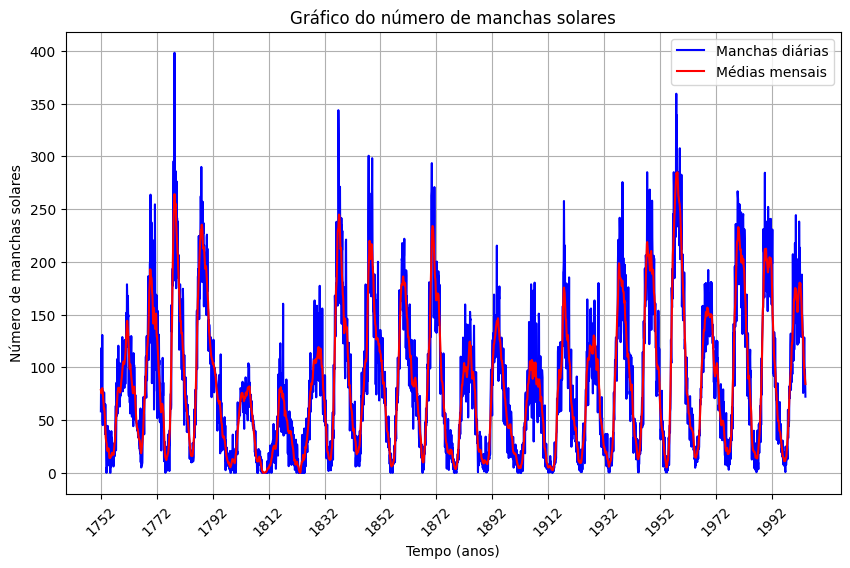

In [ ]:
opcao_selecionada = 1

print(f"{analises_oferecidas[opcao_selecionada]}")
print("A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.\n")

# Sendo selecionados:
# ano_minim = int(input("Insira o ano de início de análise (início em 1749): "))
# ano_maxim = int(input("Insira o ano final de análise: "))

ano_minim = 1752
ano_maxim = 2003

# Definindo um tamanho do gráfico melhorando a visualização
plt.figure(figsize=(10, 6))

# A verificação de dados de entrada não relata nada, e como ano_minim < 1818, o gráfico de médias mensais e médias suavizadas será gerado

gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_mensal, "blue", False, True)
gerando_graficos_sunspot(ano_minim, ano_maxim, None, "red", False, False)

# Configuração dos ticks do eixo x, como diferença de anos é maior que 100,
espacamento_de_anos = 20
rotacao = 45

tick_positions = []
tick_labels = []

for year in range(ano_minim, ano_maxim + 1, espacamento_de_anos):
    dias = calcular_dias_desde_1749(year, 1, 1)
    tick_positions.append(dias)
    tick_labels.append(str(year))

plt.xticks(tick_positions, tick_labels, rotation=rotacao)
plt.ylabel('Número de manchas solares')
plt.xlabel('Tempo (anos)')
plt.title('Gráfico do número de manchas solares')

# Para gráficos sem dados diários, apenas as médias mensais e suavizadas são plotadas
plt.legend(["Médias mensais", "Médias suavizadas mensais"])

plt.grid(True)
plt.show()


Modificando o ano de início e o final para um ano posterior, buscamos obter um gráfico incluindo gráficos azul, vermelho e amarelo (representando média mensal, suavizada e manchas diárias, respectivamente):

Gerar gráfico com as médias mensais, médias suavizadas e/ou número de manchas solares diárias em um determinado período
A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.



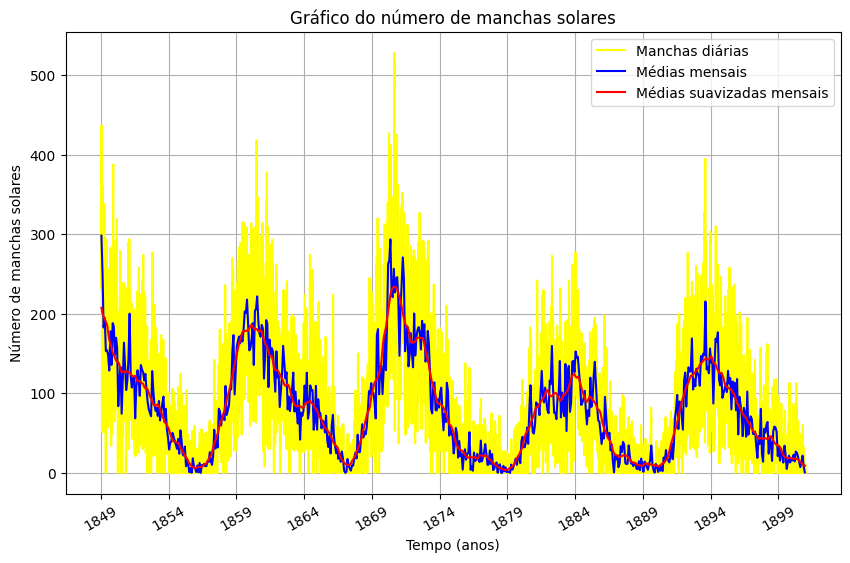

In [ ]:
opcao_selecionada = 1

print(f"{analises_oferecidas[opcao_selecionada]}")
print("A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.\n")

# Sendo selecionados:
# ano_minim = int(input("Insira o ano de início de análise (início em 1749): "))
# ano_maxim = int(input("Insira o ano final de análise: "))

ano_minim = 1849
ano_maxim = 1900

# Definindo um tamanho do gráfico melhorando a visualização
plt.figure(figsize=(10, 6))

# A verificação de dados de entrada não relata nada, e como ano_minim >= 1818, o gráfico diário, de médias mensais e médias suavizadas será gerado

gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_diario, "yellow", True, False)
gerando_graficos_sunspot(ano_minim, ano_maxim, dicio_mensal, "blue", False, True)
gerando_graficos_sunspot(ano_minim, ano_maxim, None, "red", False, False)

# Configuração dos ticks do eixo x, como diferença de anos é menor que 60,
espacamento_de_anos = 5
rotacao = 30

tick_positions = []
tick_labels = []

for year in range(ano_minim, ano_maxim + 1, espacamento_de_anos):
    dias = calcular_dias_desde_1749(year, 1, 1)
    tick_positions.append(dias)
    tick_labels.append(str(year))

plt.xticks(tick_positions, tick_labels, rotation=rotacao)
plt.ylabel('Número de manchas solares')
plt.xlabel('Tempo (anos)')
plt.title('Gráfico do número de manchas solares')

# Para o gráfico, dados diários, médias mensais e suavizadas são plotadas
plt.legend(['Manchas diárias', "Médias mensais", "Médias suavizadas mensais"])

plt.grid(True)
plt.show()


Ao entrarmos na opção de análise '1' e inserirmos um ano inválido (anterior a 1749 ou posterior a 2025), o programa deve retornar uma mensagem de erro informando que o ano é inválido e solicitar uma nova entrada até que esta seja válida. Analisaremos para o caso em que o ano de início seja posterior ao ano de fim, levando a um erro de lógica no programa caso ignorado:

In [ ]:
opcao_selecionada = 1

print(f"{analises_oferecidas[opcao_selecionada]}")
print("A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.\n")

# Sendo selecionados:
# ano_minim = int(input("Insira o ano de início de análise (início em 1749): "))
# ano_maxim = int(input("Insira o ano final de análise: "))

ano_minim = 1910
ano_maxim = 2035

# O tratamento de dados de entrada irá relatar que um dos anos digitados é inválido, aguardando novas entradas
print("\nERRO. O ano digitado não é válido. Tente novamente")
# ano_minim = int(input("Insira o ano inicial de análise: "))
# ano_maxim = int(input("Insira o ano final de análise: "))

ano_minim = 1910
ano_maxim = 1842


# Aqui, será relatado que o ano inicial é posterior ao ano final, aguardando nova entrada.
print("\nERRO. O ano final deve ser posterior ao ano inicial.")
# ano_minim = int(input("Insira o ano inicial de análise: "))
# ano_maxim = int(input("Insira o ano final de análise: "))

Gerar gráfico com as médias mensais, médias suavizadas e/ou número de manchas solares diárias em um determinado período
A análise selecionada fornece um gráfico contendo apenas as médias mensais e médias suavizadas para anos inferiores a 1818 e um gráfico contendo as médias e o número de manchas solares diários para anos a partir de 1818.


ERRO. O ano digitado não é válido. Tente novamente

ERRO. O ano final deve ser posterior ao ano inicial.


Optou-se por utilizar o teste na análise 1, pois esta trabalha com casos onde os dados diários não são acessados e que são acessados e para casos onde anos que fogem do escopo de dados disponíveis são inseridos ou em que anos válidos são inseridos, mas que não respeitam lógica cronolóigica e podem gerar erros de lógica no programa.

### 6 - Conclusão

O código desenvolvido para o trabalho prático de análise de dados de manchas solares ao longo dos anos apresenta uma estrutura modular e organizada, permitindo a realização de diversas análises sobre os dados históricos. As funções foram implementadas de forma a facilitar a leitura, manipulação e visualização dos dados, proporcionando uma compreensão clara dos padrões cíclicos das manchas solares.

Acredita-se que o programa apresenta dados que seguem resultados esperados segundo dados divulgados por instituições científicas, como a NASA e a NOAA, que divulgam um gráfico apresentando as manchas solares de 1749 a 2025, que se assemelha bastante com os gráficos gerados pelo programa. (site: https://science-nasa-gov.translate.goog/science-research/heliophysics/nasa-noaa-sun-reaches-maximum-phase-in-11-year-solar-cycle/?_x_tr_sl=en&_x_tr_tl=pt&_x_tr_hl=pt&_x_tr_pto=tc). Além disso, o programa também contabilizou ciclos variando corretamente em média de 11 em 11 anos, além de apresentar o mínimo período entre ciclos observado no ciclo solar 2, de exatamente 9 anos, e o máximo período entre ciclos observado no ciclo solar 4, de 13 anos e 8 meses.